In [2]:
import numpy as np
import subprocess
import os
import glob
import yaml
import xarray as xr
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import osprey_io as io
import osprey_means as osm 
import osprey_actions as osa

In [3]:
leg=21
yearspan = 10
yearleap = 10
endyear = 1990+leg-2
startyear = endyear - yearspan
xf = endyear+yearleap
print(startyear,endyear,xf)
data = io.readmf_T('fix0', startyear, endyear)
x = osm.dateDecimal(data['time'].values.flatten())
ds = data['to'].isel(time=0)
ds_flat = ds.values.flatten()
to_flat = data['to'].values.flatten()

1999 2009 2019


In [4]:
to_reshaped = to_flat.reshape(len(x),-1)
indices = ~np.isnan(to_reshaped)
indices_flat = ~np.isnan(to_flat)
to_valid = to_flat[indices_flat]
size_valid = to_valid.shape[0]/len(x)
to_wonan = np.zeros((len(x), int(size_valid)))
to_wonan = to_reshaped[:, indices[0]]

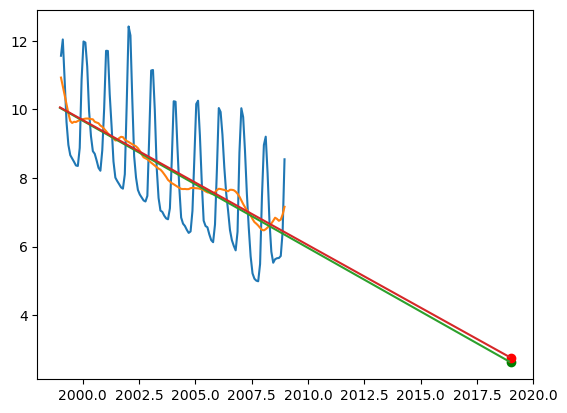

In [6]:
i=700
model = LinearRegression()
x_row = np.array(x).reshape(len(x),-1) #x_wonan[:,i].reshape(len(x),-1)
y_row = to_wonan[:,i].reshape(len(x),-1)
model.fit(x_row, y_row)
mp = model.coef_[0][0]
qp = model.intercept_[0]
yf = model.predict([[xf]])
yp = []; xp = []
for i in range(len(x)*2):
    xp.append(startyear+i/12.)
    yp.append(mp*(startyear+i/12.)+qp)
#
ym = osm.movave(y_row.flatten(),12).reshape(len(x),-1)
model.fit(x_row, ym)
mpm = model.coef_[0][0]
qpm = model.intercept_[0]
yfm = model.predict([[xf]])
ypm = []; xpm = []
for i in range(len(x)*2):
    xpm.append(startyear+i/12.)
    ypm.append(mpm*(startyear+i/12.)+qpm)
plt.plot(x_row,y_row)
plt.plot(x,ym)
plt.plot(xp,yp)
plt.plot(xpm,ypm)
plt.scatter(xf,yf, color='green')
plt.scatter(xf,yfm, color='red')

In [6]:
to_pred = []
model = LinearRegression()
x_row = np.array(x).reshape(len(x),-1)
for i in range(to_wonan.shape[1]):
    y_row = to_wonan[:, i].reshape(len(x),-1)
    model.fit(x_row, y_row)
    yf = model.predict([[xf]])
    to_pred.append(yf[0][0])

In [42]:
theta = []
j = 0
for i in range(len(ds_flat)):
    if indices[0][i]:
        theta.append(to_pred[j])        
        j += 1
    else:
        theta.append(np.nan)

In [51]:
te = np.array(theta)

In [58]:
tenew = np.array(theta).reshape((len(ds['z']),len(ds['y']),len(ds['x'])))

In [57]:
tenew.shape[1]

148

In [2]:
sdata = osa.forecast_T_fit('ut01', 21, 5, 5)

In [4]:
sdata1 = osa.forecast_T_fit('ut01', 21, 5, 10)

In [5]:
sdata2 = osa.forecast_T_fit('ut01', 21, 10, 5)

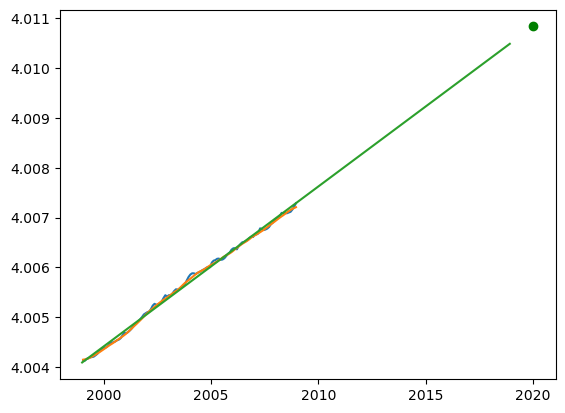

In [3]:
osa.forecast_T_fit('fix0', 21, 10, 10, check_fig=True)

In [4]:
rdata0 = io.read_restart('ut01', 21)
dd = xr.where(rdata0['tn']!=0, sdata3['tn'].values-rdata0['tn'].values, 0.0)

In [1]:
dd.isel(time_counter=0,nav_lev=0).plot()
plt.title('')

NameError: name 'dd' is not defined

In [ ]:
# check local timeseries on a grid point + fit and prediction